In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
try:
    from google.colab import drive
    IN_COLAB = True
    print("Running on Google Colab. ")
except:
    IN_COLAB = False
    print("Not running on Google Colab. ")

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')

if IN_COLAB:
    os.chdir('/content/gdrive/MyDrive/Tesi/dataset/reports')

Running on Google Colab. 
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
import os
import pandas as pd

def search_and_read_csvs(parent_directory, search_string, search_string_2):
    """
    This function searches for directories containing a given string,
    and reads all CSV files from those directories.
    """
    all_dataframes = []

    # Traverse the directory structure
    for root, dirs, files in os.walk(parent_directory):
        # Check if any directory contains the search string
        if search_string in root and search_string_2 in root:
            for file in files:
                if file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    try:
                        # Read the CSV file into a DataFrame
                        df = pd.read_csv(file_path)
                        all_dataframes.append(df)
                        # print(f"Read file: {file_path}")
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

    return all_dataframes

# Define the parent directory and the search string
parent_directory = '/content/gdrive/MyDrive/Tesi/dataset/reports'

clustertime_string = 'clustertime'
justgr_string = 'justgr'

date_string = '202102'

clustertime_df = search_and_read_csvs(parent_directory, clustertime_string, date_string)
justgr_df = search_and_read_csvs(parent_directory, justgr_string, date_string)


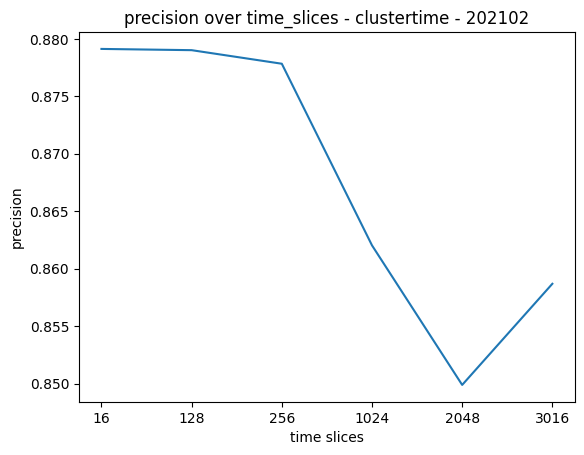

In [46]:
import numpy as np

time_slices = [16, 128, 256, 1024, 2048, 3016]
equidistant_x = np.arange(len(time_slices))
feature_to_print = 'precision'

plt.plot(equidistant_x, [clustertime_df[i].iloc[2][feature_to_print] for i in range(len(time_slices))])

plt.title(f'{feature_to_print} over time_slices - {clustertime_string} - {date_string}')
plt.xticks(equidistant_x, time_slices)
plt.xlabel('time slices')
plt.ylabel(f'{feature_to_print}')
plt.show()

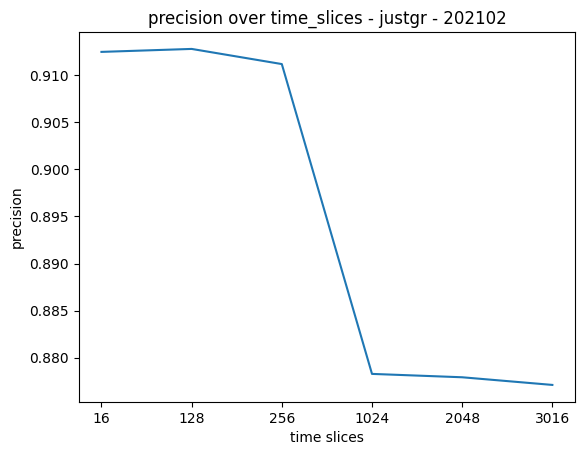

In [47]:
import numpy as np

time_slices = [16, 128, 256, 1024, 2048, 3016]
equidistant_x = np.arange(len(time_slices))
feature_to_print = 'precision'

plt.plot(equidistant_x, [justgr_df[i].iloc[2][feature_to_print] for i in range(len(time_slices))])

plt.title(f'{feature_to_print} over time_slices - {justgr_string} - {date_string}')
plt.xticks(equidistant_x, time_slices)
plt.xlabel('time slices')
plt.ylabel(f'{feature_to_print}')
plt.show()